## Imports and Data

We will be working with the 20 newsgroups dataset.

I have included the minimal sufficient imports to complete the coursework. You are welcome to import other modules.

**some functions will produce sparse matrices for which operations may not work as you expect. Make sure to check the dimensionality of your outputs. You should be able to convert to normal arrays with .toarray() if you have any problems**

**This coursework follows the Kernels for text section in the slides**

In [60]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'), subset='train', categories=['sci.electronics','rec.autos','rec.sport.hockey'])
train_documents = dataset.data
train_targets=dataset.target
train_target_names=dataset.target_names
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'), subset='test', categories=['sci.electronics','rec.autos','rec.sport.hockey'])
test_documents = dataset.data
test_targets=dataset.target
test_target_names=dataset.target_names

## 1) Using CountVectorizer or otherwise, convert the list of documents to

### a) Use CountVectorizer to get the counts of each term (word) in each of the documents

In [61]:
def term_frequencies(documents):
    count_vectorizer = CountVectorizer()
    df = count_vectorizer.fit_transform(documents)
    return df

### b) Write a function which returns the document frequency of each of the terms across all of the training documents. Use np.asarray() and np.squeeze() to ensure this produces a 1d output

In [62]:
def document_frequencies(documents):
    term_counts = term_frequencies(documents)
    return np.squeeze(np.asarray(term_counts.sum(axis=0))) #sum over all documents

### c) Using numpy.histogram followed by plt.hist, plot a histogram of the log of the document frequencies

(0.0, 13211.0)

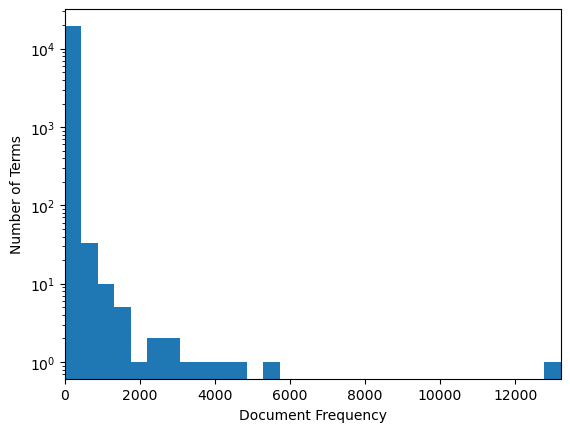

In [63]:
df_train = document_frequencies(train_documents)

n_bins = 50

plt.figure()
plt.hist(df_train, bins=30)
plt.xlabel("Document Frequency")
plt.ylabel("Number of Terms")
plt.yscale("log")
plt.xlim(0, max(df_train))

### e) Write a function which returns the inverse document frequency

In [90]:
def inverse_document_frequencies(corpus_train, corpus_test):
    N_train = len(corpus_train)
    N_test = len(corpus_test)

    df_train = document_frequencies(corpus_train)
    df_test = document_frequencies(corpus_test)

    inverter = lambda df: np.log(df/N_train)
    idf_train = inverter(df_train)

    inverter = lambda df: np.log(df/N_test)
    idf_test = inverter(df_test)

    return idf_train, idf_test

### f) Write a function which returns the tfidf weighted kernel for two sets of documents (i.e. train and test)

In [88]:
def tfidf(corpus_train, corpus_test):
    idf_train, idf_test = inverse_document_frequencies(corpus_train, corpus_test)
    tf_train = term_frequencies(corpus_train)
    tf_test = term_frequencies(corpus_test)

    tfidf_train = tf_train * idf_train
    tfidf_test = tf_test * idf_test

    return tfidf_train, tfidf_test

### g) Use an SVC classifier with the outputs of CountVectorizer (ie the term counts for each document) to classify the documents according to the train_targets and test_targets and present the performance of this classifier in a suitable way.

In [74]:
tf_train = term_frequencies(train_documents)
tf_test = term_frequencies(test_documents)
svc = SVC()
svc.fit(tf_train, train_targets)

# y_predict = svc.predict(tf_test)
print(f"Cannot predict test data as test and training sets have different number of words, and thus a different number of features")
print(tf_train.shape)
print(tf_test.shape)

Cannot predict test data as test and training sets have different number of words, and thus a different number of features
(1785, 19663)
(1188, 14717)


The training accuracy is:  0.70


Text(50.722222222222214, 0.5, 'Actual Value')

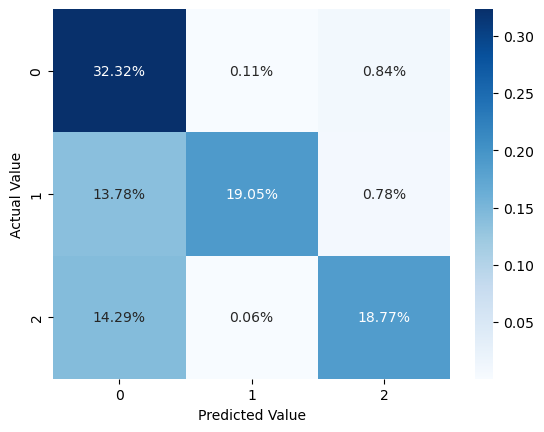

In [78]:
from sklearn import metrics
import seaborn as sns

#predicting on training data instead
y_predict = svc.predict(tf_train)
accuracy_train = metrics.accuracy_score(train_targets, y_predict)
print(f"The training accuracy is: {accuracy_train : .2f}")

cm = metrics.confusion_matrix(train_targets, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

### h) Construct the tfidf kernel for the train (n_train x n_train) and test (n_test x n_train) data

In [89]:
tfidf_train, tfidf_test = tfidf(train_documents, test_documents)

In [85]:
print(tfidf_train.shape)
print(tfidf_test.shape)

(1785,)
(1188,)


### i) use the SVC classifier again to classify the documents. Compare the performance to the previous case

In [ ]:
#YOUR CODE HERE

### j) Extension: Use (Kernel/Linear) PCA with varying dimensions of your tfidf kernel and repeat the classification or explore the eigenvalues of the kernel PCA and comment.

In [ ]:
#YOUR CODE HERE